<a href="https://colab.research.google.com/github/Shrutakeerti/Assignment-Submission/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install praw pandas nltk textblob scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.8 MB/s eta 0:00:00


In [4]:
import praw
import pandas as pd
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import praw
import pandas as pd

# Set your Reddit API credentials
REDDIT_CLIENT_ID = 'zBslG12V_uTtmH1K8ieYSQ'
REDDIT_SECRET = 'd0IUvqDAK7Z1plYz0Vr4MBWHK2pgsg'
REDDIT_USER_AGENT = 'TaeTaeBot:v1.0 (by /u/Equivalent_Let_8310)'

# Create a Reddit instance
reddit = praw.Reddit(
    client_id=REDDIT_CLIENT_ID,
    client_secret=REDDIT_SECRET,
    user_agent=REDDIT_USER_AGENT
)

# Function to scrape Reddit data
def scrape_reddit(subreddit_name, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for submission in subreddit.hot(limit=limit):
        posts.append({
            'title': submission.title,
            'selftext': submission.selftext,
            'score': submission.score,
            'created_utc': submission.created_utc
        })

    return pd.DataFrame(posts)

# Example: Scrape data from r/stocks
df_reddit = scrape_reddit('stocks', limit=500)

# Display the first few rows of the scraped data
print(df_reddit.head())



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...   
1  r/Stocks Daily Discussion & Technicals Tuesday...   
2  Microsoft announces $60 billion stock buyback ...   
3  Canada's inflation cools to 2% in Aug, reaches...   
4  U.S. Awards Intel $3 Billion for Military Supp...   

                                            selftext  score   created_utc  
0  Please use this thread to discuss your portfol...      6  1.725181e+09  
1  This is the daily discussion, so anything stoc...      8  1.726565e+09  
2  The share repurchase agreement, which has no e...   1846  1.726530e+09  
3  Referencing to Canada's case, inflation target...     82  1.726577e+09  
4  The Biden administration announced on Monday t...    456  1.726518e+09  


In [5]:
# Combine title and selftext for analysis
df_reddit['text'] = df_reddit['title'] + ' ' + df_reddit['selftext']

# Perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df_reddit['sentiment'] = df_reddit['text'].apply(analyze_sentiment)

# Optional: Add a simple binary sentiment classification
df_reddit['sentiment_class'] = df_reddit['sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Display first few rows
df_reddit.head()


,title,selftext,score,created_utc,text,sentiment,sentiment_class
0,Rate My Portfolio - r/Stocks Quarterly Thread ...,Please use this thread to discuss your portfol...,6,1.725181e+09,Rate My Portfolio - r/Stocks Quarterly Thread ...,0.186026,1
1,r/Stocks Daily Discussion & Technicals Tuesday...,"This is the daily discussion, so anything stoc...",8,1.726565e+09,r/Stocks Daily Discussion & Technicals Tuesday...,-0.011218,0
2,Microsoft announces $60 billion stock buyback ...,"The share repurchase agreement, which has no e...",1846,1.726530e+09,Microsoft announces $60 billion stock buyback ...,-0.037879,0
3,"Canada's inflation cools to 2% in Aug, reaches...","Referencing to Canada's case, inflation target...",82,1.726577e+09,"Canada's inflation cools to 2% in Aug, reaches...",0.120620,1
4,U.S. Awards Intel $3 Billion for Military Supp...,The Biden administration announced on Monday t...,456,1.726518e+09,U.S. Awards Intel $3 Billion for Military Supp...,0.115291,1


In [6]:
# Feature extraction
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_reddit['text'])
y = df_reddit['sentiment_class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7011494252873564

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.48      0.43        21
           1       0.82      0.77      0.80        66

    accuracy                           0.70        87
   macro avg       0.61      0.62      0.62        87
weighted avg       0.72      0.70      0.71        87



In [8]:
# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7011494252873564

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.48      0.43        21
           1       0.82      0.77      0.80        66

    accuracy                           0.70        87
   macro avg       0.61      0.62      0.62        87
weighted avg       0.72      0.70      0.71        87



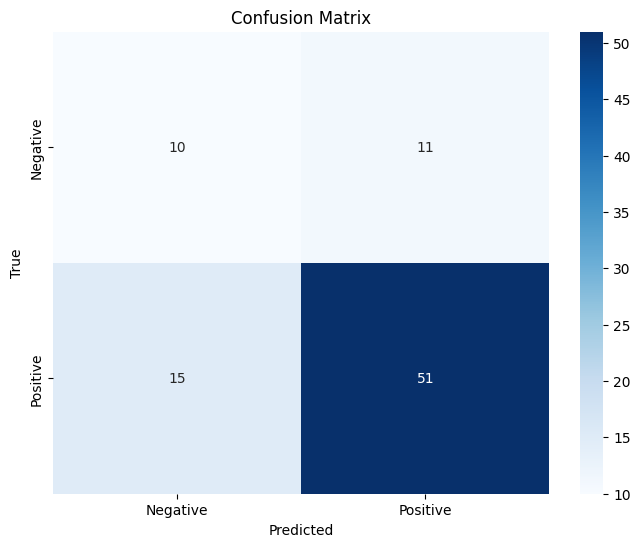

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Text preprocessing function
def preprocess_text(text):
    # Remove special characters
    text = re.sub(r'\W', ' ', text)

    # Lowercase text
    text = text.lower()

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])

    return text

# Apply text preprocessing
df_reddit['cleaned_text'] = df_reddit['text'].apply(preprocess_text)

# Use TF-IDF for feature extraction
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_reddit['cleaned_text'])
y = df_reddit['sentiment_class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Tune hyperparameters with GridSearchCV
params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'none'],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(log_reg, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_log_reg = grid_search.best_estimator_

# Train the model
best_log_reg.fit(X_train, y_train)

# Make predictions
y_pred = best_log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.8275862068965517

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.44        21
           1       0.81      1.00      0.90        66

    accuracy                           0.83        87
   macro avg       0.91      0.64      0.67        87
weighted avg       0.86      0.83      0.79        87



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us